Example of instrument spectral response function fitting

In [1]:
from __future__ import annotations

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from peakspline import fit_peakspline, gauss, gauss_integ_tot

In [2]:
plt.rcParams['figure.dpi'] = 120

In [3]:
np.random.seed(1337)

In [4]:
def plot_results(psr, xdata, ydata):
    xhr = np.linspace(xdata.min(), xdata.max(), 1000)  # [nm]
    plt.figure()
    plt.plot(xdata, ydata, "C0.", label="sampling points")
    plt.plot(xhr, psr(xhr), "C0", label="spline fit")
    plt.plot(
        [psr.center, psr.center], [0, psr(psr.center)], "C2", label="center")
    xfill = np.linspace(
        psr.center - psr.resolution / 2, psr.center + psr.resolution / 2, 1000)
    plt.fill_between(
        xfill, psr(xfill), color="C2", alpha=0.5, label="resolution area")
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Signal [A.U.]")
    plt.legend()
    plt.tight_layout()

    print(f"Fitted center position: {psr.center:.2f} nm")
    print(f"Fitted resolution: {psr.resolution:.2f} nm")

# Single peak

In [5]:
xdata = np.arange(490., 510., 1.)  # [nm]
center = 500.3
fwhm = 3.6
amp = 1.
ydata = gauss(xdata, center, fwhm, amp)
# ydata = np.random.normal(ydata, 0.01*ydata)

In [6]:
psr = fit_peakspline(xdata, ydata)

Fitted center position: 500.30 nm
Fitted resolution: 3.60 nm


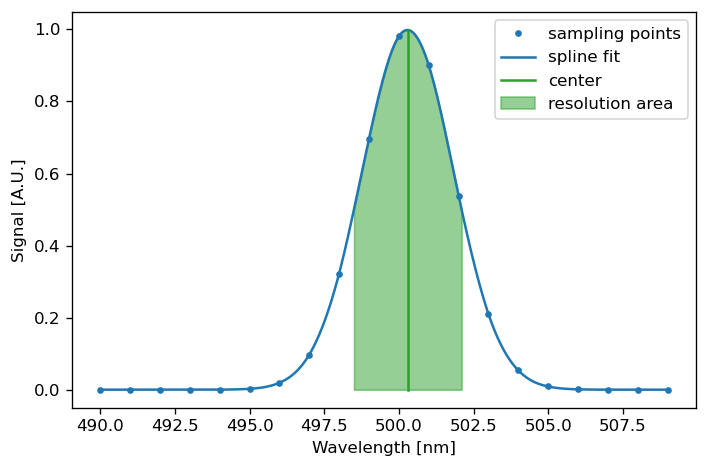

In [7]:
plot_results(psr, xdata, ydata)

As we can see, the fitted center and resolution match the initial parameter of the Gaussian function well.

# Double peak

In [8]:
xdata = np.arange(490., 510., 0.5)
xhr = np.linspace(xdata.min(), xdata.max(), 1000)
center = 500.3
amp = 1.
fwhm = 2.2
ydata = gauss(xdata, center - 1.5, fwhm, 0.6) + gauss(
    xdata, center + 1.5, fwhm, 1)
# ydata = np.random.normal(ydata, 0.01*ydata)

In [9]:
psr = fit_peakspline(xdata, ydata)

Fitted center position: 501.03 nm
Fitted resolution: 4.34 nm


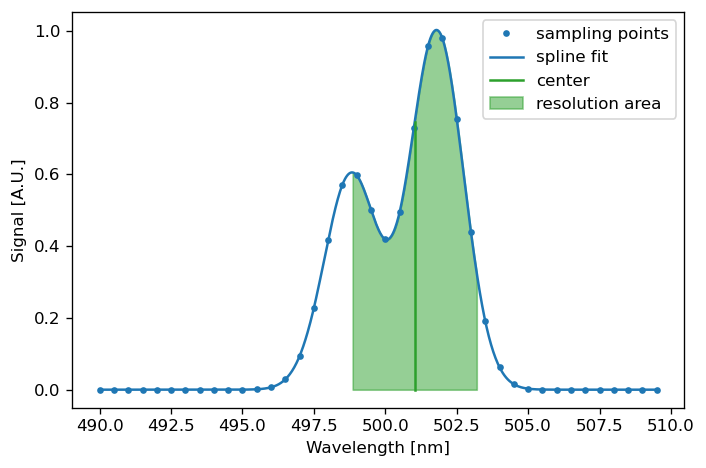

In [10]:
plot_results(psr, xdata, ydata)

Please note that the center is not the position of the maximum and that the resolution is not the FWHM.